In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob
import os
from scipy import stats

In [35]:
df = pd.read_csv("2010Census_White_AfricanAmerican.csv")
df1 = pd.read_csv("Globbed.csv")
df1 = df1[['Zip Code', 'Rates']]

df1

,Zip Code,Rates
0,96129,403.31
1,96105,273.25
2,94963,221.22
3,95251,195.54
4,95039,127.72
...,...,...
1747,95828,0.00
1748,90249,0.00
1749,95830,0.00
1750,90248,0.00


In [36]:
df[['Geography', 'White', 'Black or African American']]
rename = df.rename(columns={'Geography': 'Zip Code', 'Black or African American': 'Black'})
rename_df = rename[['Zip Code', 'White', 'Black']]
merge_df = pd.merge(df1, rename_df)
merge_df

,Zip Code,Rates,White,Black
0,96129,403.31,250,1
1,96105,273.25,488,2
2,94963,221.22,536,5
3,95251,195.54,702,0
4,95039,127.72,795,24
...,...,...,...,...
1685,95828,0.00,"18,677","8,764"
1686,90249,0.00,"7,866","8,082"
1687,95830,0.00,597,39
1688,90248,0.00,"2,801","1,500"


In [37]:
merge_df['Group'] = ''
g1 = merge_df['White'] < merge_df['Black']
g2 = merge_df['Black'] < merge_df['White']
merge_df['Group'][g1] = "Black"
merge_df['Group'][g2] = "White"
merge_df

C:\anaconda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\anaconda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Zip Code,Rates,White,Black,Group
0,96129,403.31,250,1,White
1,96105,273.25,488,2,White
2,94963,221.22,536,5,White
3,95251,195.54,702,0,White
4,95039,127.72,795,24,White
...,...,...,...,...,...
1685,95828,0.00,"18,677","8,764",Black
1686,90249,0.00,"7,866","8,082",Black
1687,95830,0.00,597,39,White
1688,90248,0.00,"2,801","1,500",White


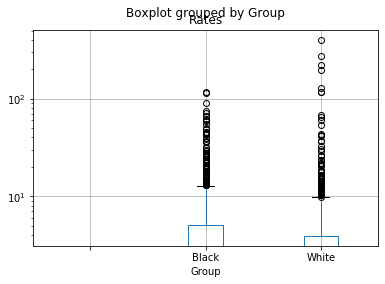

In [38]:
merge_df.boxplot('Rates', by='Group')
plt.yscale('log')

In [39]:
stats.f_oneway(merge_df['Rates'][g1], merge_df['Rates'][g2])

F_onewayResult(statistic=0.0026730635705175085, pvalue=0.9587725278772308)